In [224]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tsfresh.transformers import RelevantFeatureAugmenter

from orbit.models.dlt import ETSFull

In [225]:
data = pd.read_csv("../data/summer.csv", index_col=0, parse_dates=['time'])
#data['time'] = pd.to_datetime(data['time'])
#data.index = data['time']

#data = data.drop('time', axis=1)

In [226]:
df = pd.DataFrame(data)
df

,time,price
0,2021-06-01 04:00:00+00:00,125.00
1,2021-06-01 04:15:00+00:00,125.17
2,2021-06-01 04:30:00+00:00,125.20
3,2021-06-01 04:45:00+00:00,125.30
4,2021-06-01 05:00:00+00:00,125.38
...,...,...
4720,2021-08-27 21:30:00+00:00,148.42
4721,2021-08-27 21:45:00+00:00,148.47
4722,2021-08-27 22:00:00+00:00,148.47
4723,2021-08-27 22:15:00+00:00,148.44


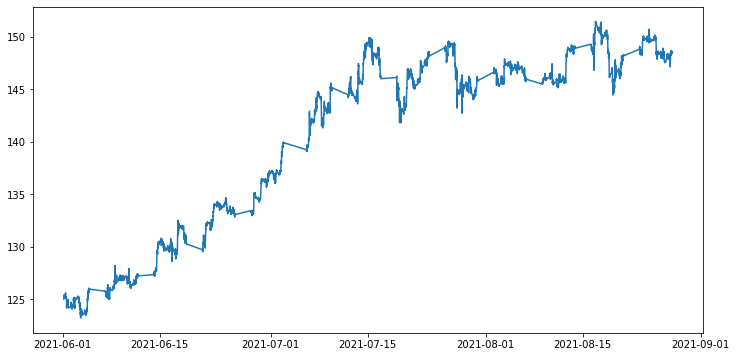

In [227]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['time'], df['price'])
#ax.xaxis.set_major_locator(ticker.MultipleLocator(len(df['time']) / 7))
plt.show()

In [228]:
df['time'] = pd.to_numeric(df['time'])
train = df[:len(df) - 65]
test = df.tail(65)
train.dtypes

time       int64
price    float64
dtype: object

In [229]:
#dlt = DLTFull(response_col='price', date_col='time')
ets = ETSFull(
    response_col='price',
    date_col='time',
)

In [230]:
%%time
ets.fit(train)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_982090c5656030fa038b63e5c383dbff NOW.


ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [231]:
predicted_df = ets.predict(test)

PredictionException: Model is not fitted yet.